# Text classification with sklearn and linear models

Text classification is one of the most popular applications of NLP.
Your email checks if the message looks like spam or not (binary classification).
Your smart speaker needs to understand what action it should do when you say "what's the weather like today?".
This is a classification task over a large number of classes `get_time, get_directions, get_weather, ...` (multiclass classification).
Other popular classification tasks include news topic prediction, clickbait detection, hate speech detection, and sentiment analysis.

*Sentiment analysis* is a task where (in the simplest form) given a text you need to predict if the text is positive ("my new laptop is amazing") or negative ("the company XYZ steals our personal data"). The definitions of "positive" and "negative" generally depend on the domain of your task. For example "long-lasting smell" may carry positive sentiment in the context of perfume but might be negative in the context of a cleaning solution. Sentiment analysis systems could be used by the companies who want to understand how positive was the social media reaction to their latest announcement or in the user feedback forms to address the negative feedback quickly.

In this homework, we will be predicting the sentiment of movie reviews using IMDB dataset. First, let's use [🤗 Datasets](https://github.com/huggingface/datasets) library to download it for us.

In [ ]:
!pip install datasets scikit-learn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import datasets
imdb = datasets.load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

🤗 Datasets is a popular [library](https://huggingface.co/docs/datasets) and a [repository](https://huggingface.co/datasets) of datasets.
It can be used to download pre-existing datasets, pre-process them, and could be applied to your own datasets too.
In this homework we will mostly just use it to download the dataset and look at some of its statistics, but in the future, you will learn more about it.

Let's look at the dataset we have just downloaded.

In [ ]:
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

We see that `imdb` has type `DatasetDict` and it consists of three parts (commonly called "splits"): `train`, `test`, and `unsupervised`. All of these have the type `Dataset`. The subset `train` has 25000 examples and we will use it to train our model, `test` also contains 25000 examples (which is an uncommonly large size of test size, usually test is significantly smaller than train). Both of these splits have fields `text` and `label` containing the movie review text and a label if the review is positive or not.

`unsupervised` set does not have labels (all of them are -1 irregardless of their sentiment). More advanced ML methods can utilize this to improve model accuracy, but we will not use it in this homework.

# Coding Task 1
Let's look at a couple of examples from the train split. You can index the `Dataset` object just like usual python arrays providing the index in square brackets, for example  `train_set[0]` with return you the first element of the dataset. Try looking at the first and the last elements.

In [ ]:
train_set = imdb["train"]

In [ ]:
# Get the first element of the train_set
# YOUR CODE HERE
row = train_set[0]
print("first row label: ", row['label'])
print("first row text:  ", row['text'])

first row label:  0
first row text:   I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudi

In [ ]:
# Get the last element of the train_set
# YOUR CODE HERE
row = train_set[-1]
print("last row label: ", row['label'])
print("last row text:  ", row['text'])


last row label:  1
last row text:   The story centers around Barry McKenzie who must go to England if he wishes to claim his inheritance. Being about the grossest Aussie shearer ever to set foot outside this great Nation of ours there is something of a culture clash and much fun and games ensue. The songs of Barry McKenzie(Barry Crocker) are highlights.


## Dataset statistics

A good first thing to do when you see a new dataset is to look at its statistics. For example at the distributions of classes, and lengths of the texts.

We can use python [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp) and function `sum` to quickly get the answer to our first question.

In [ ]:
import matplotlib.pyplot as plt

N positive:  12500
N negative:  12500


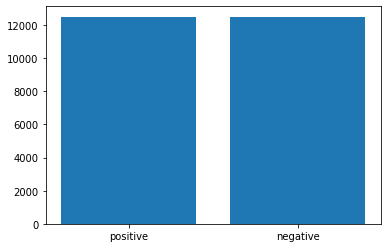

In [ ]:
n_positive_examples = sum(label == 1 for label in train_set["label"])
n_negative_examples = sum(label == 0 for label in train_set["label"])

plt.bar(x=["positive", "negative"], height=[n_positive_examples, n_negative_examples])
print("N positive: ", n_positive_examples)
print("N negative: ", n_negative_examples)

Looks like the training set is perfectly balanced. What about the test set?

# Coding Task 2

Compute the number of positive and negative labels in the test set. Print the numbers and make a matplotlib barplot in the same way we did above.

N positive:  12500
N negative:  12500


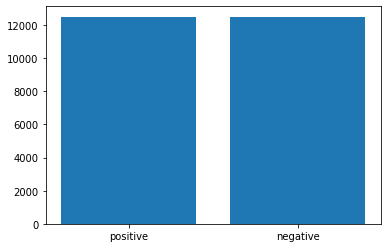

In [ ]:
test_set = imdb["test"]

# YOUR CODE HERE
n_positive_examples = sum(label == 1 for label in test_set["label"])
n_negative_examples = sum(label == 0 for label in test_set["label"])

plt.bar(x=["positive", "negative"], height=[n_positive_examples, n_negative_examples])
print("N positive: ", n_positive_examples)
print("N negative: ", n_negative_examples)


Now let's plot the distributions of the number of words in the dataset. For now, we will define "word" as a contiguous sequence of characters that does have a space symbol.

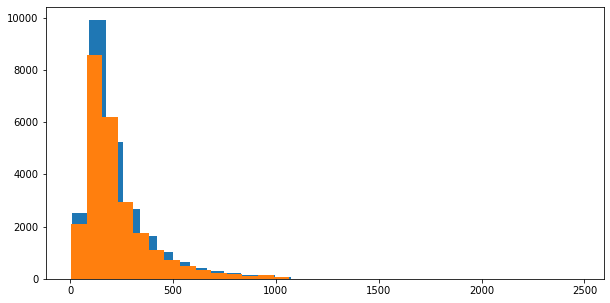

In [ ]:
n_words_train = [len(text.split(" ")) for text in train_set["text"]]
n_words_test = [len(text.split(" ")) for text in test_set["text"]]

plt.figure(figsize=(10, 5))
plt.hist(n_words_train, bins=30, label="train")
plt.hist(n_words_test, bins=30, label="test");

Some of these texts are quite long. Fortunately, this is not a problem for the methods we are going to use today.

## What metric to use

Now, after knowing something about the distribution of labels in the dataset, we can think about the metric we will use to compare our models.
Because this is a binary classification task and everything is perfectly balanced, we can just use accuracy.

# Inline question
Answer the following questions


**Q1:** What is the accuracy of the worst possible predictor on a balanced test set (binary classification)?

**A:** YOUR ANSWER
Worst case (pure guess) is 50% for binary classification task on a balanced dataset.

**Q2:** Imagine you have a predictor *A* that has 0% accuracy on your balanced binary classification task and another predictor *B* that has 50% accuracy on the same test set. Which model is actually worse? Can you improve any of these predictors with some simple post-processing of the results (the binary prediction)?

**A:** YOUR ANSWER
The predictor with 0% accuracy is actually a perfect predictor, it's just got the target labels swapped.
So to answer the second question - post-processing the 0% predictor by swapping the prediction labels would result in 100% accuracy. For the 50% predictor you cannot improve the results by just post-processing.

**Q3:** Should the accuracy 99% be considered "good" for any binary classification dataset?

**A:** YOUR ANSWER
"Good" depends on the context.  99% is not satisfactory for stoplight prediction but fine for ad placement. The requirements of the system define what is 'good'.

**Q4:** Imagine that you have a binary classification dataset that has 99.9% of one class and 0.1% of the other. What is the best possible accuracy for a predictor that completely ignores the text?

**A:** YOUR ANSWER
Always predicting the "heavy" class will average 99.9% accuracy here.

**Q5:** Is it a good idea to use accuracy as the main metric in the example above? Are there any other metrics that would work better in this situation?

**A:** YOUR ANSWER
Accuracy is not a good measure when classes are unbalanced.
Alternatives include:
* Sensitivity = TruePositive / (TruePositive + FalseNegative)
* Specificity = TrueNegative / (FalsePositive + TrueNegative)
* G-Mean = sqrt(Sensitivity * Specificity)
* Precision = TruePositive / (TruePositive + FalsePositive)
* Recall = TruePositive / (TruePositive + FalseNegative)
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)
* Fbeta-Measure = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)

(reference https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)




## Text vectorization

In the class, we have talked about possibly the simplest way to represent text to a computer: bag-of-words (BoW) approach. BoW assumes that the order of the words in the text does not matter. Sounds ridiculous? We will see it in action soon. Now, let's look into how it works.

Scikit-learn (`sklearn`) is a popular framework for *Classical ML* and it includes many machine learning models including nearest-neighbors, trees, SVMs, and linear models.
Also, it includes different pre-processing techniques. We will explore text vectorizers, namely `CountVectorizer` and `TfidfVectorizer`.

Both of these vectorizers describe every text with a fixed-sized vector, where every vector position has a word associated with it.
The difference between them is what numbers we set to these vector positions.

`CountVectorizer` is the more simple one, because for it the number is just how many times the word appears in the text. For example, if your text is "can a canner can a can", it could be described with a vector [3, 2, 1] where 3 is the count of the word "can", 2 -- "a", and 1 -- "canner". In order for the vectors to be meaningful, the vectorizer needs to have a defined vocabulary of words it accounts for and the defined order of the words in the vocabulary so that the index 0 would always correspond to a word "can" in any text.

Let's create a `CountVectorizer` object.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer

CountVectorizer()

It is not very useful right now. If you will try to use it to vectorize text (`.tranform` method),
it will return you `NotFittedError: Vocabulary not fitted or provided`, because we have not defined the vocabulary for it.

In [ ]:
# you can uncomment this like and check that it fails if count_vectorizer is not fitted
# count_vectorizer.transform(["text"])

We can provide this vocabulary directly, but a more convenient way to work with sklearn vectorizers is to make them infer the vocabulary on a set of texts using `.fit` method.

In [ ]:
toy_texts = ["this is a small text", "this is another small text"]

count_vectorizer = count_vectorizer.fit(toy_texts)
count_vectorizer.vocabulary_

{'this': 4, 'is': 1, 'small': 2, 'text': 3, 'another': 0}

In [ ]:
# question about the word 'a'

Now, we can vectorize a text like this



In [ ]:
count_vectorizer.transform(["text"]).todense()

matrix([[0, 0, 0, 1, 0]])

In [ ]:
count_vectorizer.transform(["text text"]).todense()

matrix([[0, 0, 0, 2, 0]])

As you can see, the text "text" has 0s everywhere, except position 3, which corresponds to the number of times the word "text" appears (see the vocabulary one cell above).

**Note:** `.todense` here transforms a sparse matrix that `.transform` returns into a dense matrix, you can learn more about [sparce maticies](https://en.wikipedia.org/wiki/Sparse_matrix), but it is not necessary for the purpose of this class.

# Coding Task 3

What if we vectorize text that has words outside vocabulary (out-of-vocabulary, OOV)? What if it only consists of them? Try vectorizing such texts

In [ ]:
# vectorizing a text with a OOV word
# YOUR CODE HERE
count_vectorizer.transform(["text text foobar"]).todense()
# Answer: the OOV word is ignored

matrix([[0, 0, 0, 2, 0]])

In [ ]:
# vectorizing a text that only has OOV words
# YOUR CODE HERE
count_vectorizer.transform(["foobar foobar"]).todense()
# Answer: the result is equivalent to that of a text having no words

matrix([[0, 0, 0, 0, 0]])

Now, let's try `TfidfVectorizer`. It has pretty much the same interface as `CountVectorizer`. We will see that if we fit it on the same examples, we have the same vocabulary, and the vector for the text "text" is the same, but the vectors for the text "another text" will be different for `TfidfVectorizer` and `CountVectorizer`.

In [ ]:
toy_texts

['this is a small text', 'this is another small text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = tfidf_vectorizer.fit(toy_texts)
tfidf_vectorizer.vocabulary_

{'this': 4, 'is': 1, 'small': 2, 'text': 3, 'another': 0}

In [ ]:
tfidf_vectorizer.transform(["text"]).todense()

matrix([[0., 0., 0., 1., 0.]])

In [ ]:
print("Count Vector:", count_vectorizer.transform(["another text"]).todense())
print("Count Vector:", tfidf_vectorizer.transform(["another text"]).todense())

Count Vector: [[1 0 0 1 0]]
Count Vector: [[0.81480247 0.         0.         0.57973867 0.        ]]


This happens for two reasons:

**First,** TfIDF is computed as two terms: term frequency (TF) or how many times we see the word in this text and inverse document frequency (IDF) or how many documents have this word in them.

TF of a word is exactly what `CountVectorizer` do, just how many times we see a word in this particular text.

IDF of a word is the number of documents in the training corpus that have this word (by training corpus we mean the texts we used to fit this vectorizer). More specifically, 1 divided by this number, hence, inverse.

TF-IDF vectors usually work better than just Count Vectors in practice.


**Second,** sklearn just uses normalization for the term frequency in `TfidfVectorizer` by default (i.e., it divides the vector by the number of words in the text), but doesn't do this for `CountVectorizer` for some reason. This normalization helps machine learning models to train more easily.


There are multiple ways of combining these two values, the simplest being just multiplying them.

`tfidf = TF * IDF`

where

`TF = word_count_in_text / total_words_in_text`

`IDF = (document_count_with_this_word / total_documents) ** -1`

> Sklearn uses a slightly different formula to better account for OOV and make the vectors less probable to cause computational errors idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1. You can look it up in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer).

## Training a model

Now let's fit a vectorizer on our training set of IMDB and train our first text classifier.

In [ ]:
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(train_set["text"])
len(vectorizer.vocabulary_)

74849

In [ ]:
vectorized_texts = vectorizer.transform(train_set["text"])
vectorized_texts.shape

(25000, 74849)

This matrix has the shape `[num_examples, vector_size]`.
We can see that the size of the text vector now is very big,
because large collection of texts contains a lot of different words,
meaning large vocabulary, meaning large vector size.

Fortunately, this is not a problem for logistic regression, which is incredibly fast to train. (Ignore the warning, it means that LogisticRegression is not fully converged, but it is fine).

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(vectorized_texts, train_set["label"])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now we have a model that can do sentiment analysis for us! This is how you can use it

In [ ]:
def predict_sentiment(text, model, vectorizer):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)[0]
    if prediction == 1:
        return "Positive"
    return "Negative"

In [ ]:
predict_sentiment("this is an amazing movie!", model, vectorizer)

'Positive'

# Coding task 4

Play with the model you have just trained and try to find examples where it 

1. **correctly** predicts **positive** sentiment
1. **correctly** predicts **negative** sentiment
1. **incorrectly** predicts **positive** sentiment
1. **incorrectly** predicts **negative** sentiment

In [ ]:
# YOUR CODE HERE
print("correct positive:   ", predict_sentiment("it was interesting and exciting", model, vectorizer))
print("correct negative:   ", predict_sentiment("it was dreary and long", model, vectorizer))
print("incorrect positive: ", predict_sentiment("I'm happy this will be the director's last film", model, vectorizer))
print("incorrect negative: ", predict_sentiment("A movie about ocean depths, the filming in the dark underwater scenes left me speechless", model, vectorizer))



correct positive:    Positive
correct negative:    Negative
incorrect positive:  Positive
incorrect negative:  Negative


# Inline question

**Q6-9:** Try to explain model behavior for each case:

1. YOUR ANSWER

The correct positive example uses words "interesting" and "exciting" which are typically positive responses so the model predicts correctly.
1. YOUR ANSWER

The correct negative example uses the words "dreary" and "long" are typically associated with negative reviews so the model predicts correctly.

1. YOUR ANSWER

The incorrect positive example uses the word "happy" which is typically positive, but the example says they are happy because it's the last movie the director will make. The model does not pick up on the nuance and mispredicts.
1. YOUR ANSWER

The incorrect negative example uses the words "depths", "dark" and "underwater" in the context of an under-sea movie. These are typically negative words. The model does not consider the deep-sea context to discount the negative-sounding words, thus mispredicts.

## Evaluating the model

We can see that model works. Kind of. How well exactly does it work? Let's compute accuracy on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

vectorized_texts_test = vectorizer.transform(test_set["text"])
test_set_predictions = model.predict(vectorized_texts_test)

print("Test accuracy is ", accuracy_score(y_true=test_set["label"], y_pred=test_set_predictions))

Test accuracy is  0.86388


Not too bad! 86% accuracy (on a balanced test set) using a really simple text representations that do not even account for the word order.

# Inline question:

**Q10:** Can we use a different vectorizer here?
For example, can we fit a new `CountVectorizer` on the test set
and use it instead of `vectorizer` we fitted on the train set?

**A:** YOUR ANSWER
No, vectorizer.fit() generates a vocabulary and establishes an index for that vocabulary. This is held internally to the vectorizer and used in subsequent operations such as .transform(). If you .fit() a different vectorizer it would have different index and dictionary.


# Coding task 5
### Optimizing pre-processing and hyperparameters

Your next task is to improve the model and achieve more than 90% test accuracy. To simplify the experimentation, we provide you with a shorter code that builds a vectorizer, model, and evaluates everything in just a couple of lines of code.

To improve the results you can play with different vectorizers, with different vectorizer parameters, and model regularization. We recommend comparing `CountVectorizer` with `TfidfVectorizer`, learning about ngrams, and controlling for the maximum number of features. For the model, we recommend tuning the regularization parameter. You can check all of these parameters out in the sklearn documentation.

1. [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
1. [TfidfVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
1. [LogisticRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

> reading the documentation is an essential skill and it's better to start learning it as soon as possible


Feel free to use other models from sklearn too (this is not necessary to achieve 90% accuracy).

**NOTE:** It is ok to be stuck on this task for a bit, but if you can't seem to achieve more than 90% accuracy, feel free to contact our TA.

In [ ]:
# YOUR CODE HERE
x_vec = TfidfVectorizer(
    analyzer='word', ngram_range=[1,5],
    min_df=7, max_df=2500).fit(train_set["text"])

X_train = x_vec.transform(train_set["text"])
y_train = train_set["label"]

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

X_test = x_vec.transform(test_set["text"])
y_test = test_set["label"]

predictions_test = model.predict(X_test)
test_accuracy_score = accuracy_score(y_true=y_test, y_pred=predictions_test)
print("test_accuracy ", test_accuracy_score)

test_accuracy  0.90236


# Submitting your solution

1. Restart the jupyter kernel and run the whole notebook (there's a single button to do this on the top panel). Make sure that the notebook executes completely without any issues. If you have bugs in the submitted notebook, this will affect your grade for this homework.

2. Make sure you have answered all of the written questions (Q1-Q10) and have solved all of the coding tasks (5 in total).

3. Pase your inline question answers to the [Google Form for this homework](https://forms.gle/Hhswn3W9WA1kUtvDA). For some of them, there are multiple correct answers (one of them is enough). 70% of correct answers account for the maximum inline question score, so there is no problem if one or three of them are answered incorrectly.

4. Submit your notebook (executed top-to-bottom as in step 1) to blackboard.